In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [5]:
data = pd.read_csv('./heart.csv') #dataset has 76 attributes and gives a score from 0 to 4 on presence of heart disease

In [6]:
#exploratory data analysis
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.isnull().sum() #contains null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.shape

(303, 14)

In [10]:
#display properties of dataset, from the number of entries to percentiles and mean
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


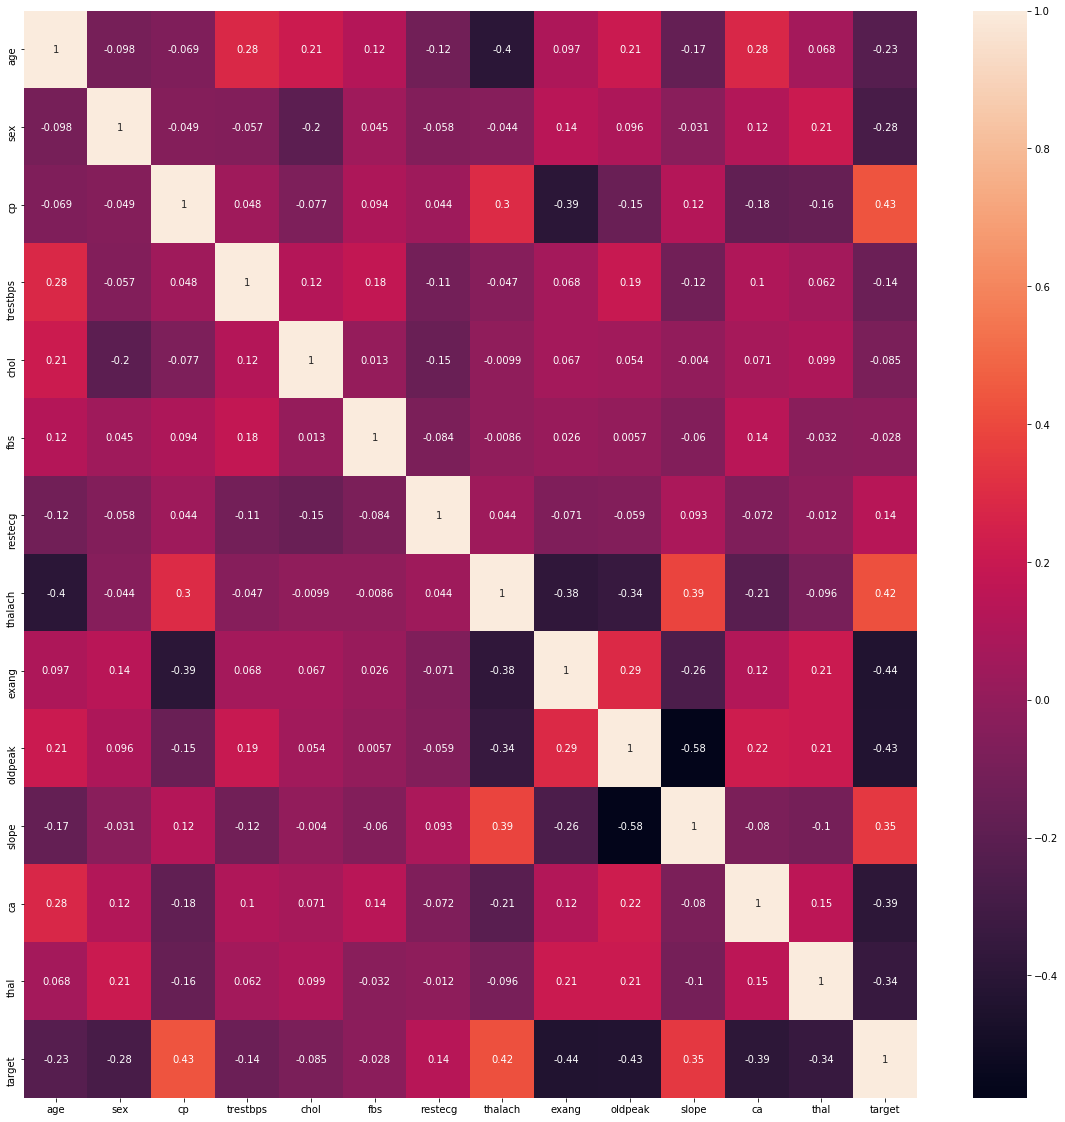

In [11]:
#create correlation heatmap matrix to evaluate correlation between varaibles
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True)
#from this, we can see that there is a correlation with chest pain, age, cholestorol level and the target variable

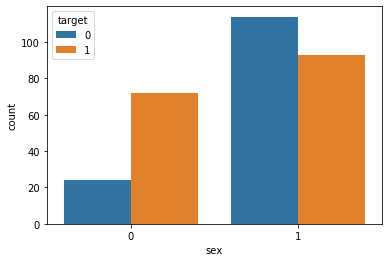

In [12]:
#comparison of sex and relationship with target variable
sns.countplot(x = 'sex',hue = 'target',data = data)

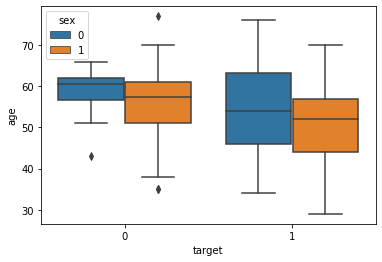

In [13]:
#comparison of sex and relationship with target variable - boxplot
sns.boxplot(x='target',y='age',hue='sex',data=data)

In [14]:
#number of people who have had a heart attack taking into account sex and cholesterol level
data_Sex_Chole = data.groupby(['sex','chol'])['target'].count().reset_index().sort_values(by='target',ascending=False)
data_Sex_Chole.head(10)

,sex,chol,target
115,1,212,5
109,1,204,4
135,1,234,4
134,1,233,4
172,1,282,4
150,1,254,4
48,0,269,4
144,1,246,3
143,1,245,3
141,1,243,3


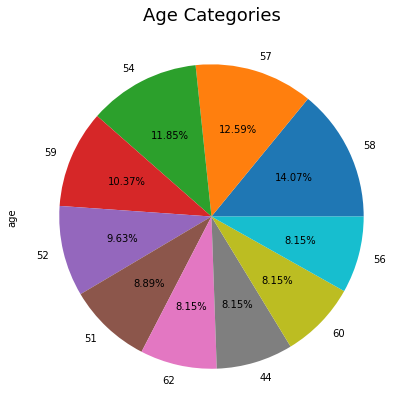

In [15]:
plt.figure(figsize=(7,7))
df = data.age.value_counts().to_frame()
textprops = {"fontsize":15}
df.head(10).age.plot(kind='pie',autopct='%.2f%%')

plt.title("Age Categories",fontsize = 18)
plt.show()

In [69]:
numerical_data = ['age', 'trestbps','chol', 'thalach', 'oldpeak']

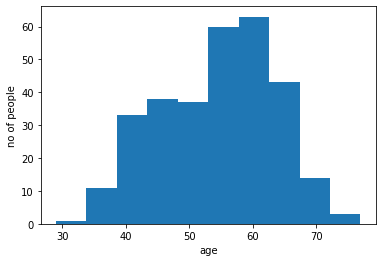

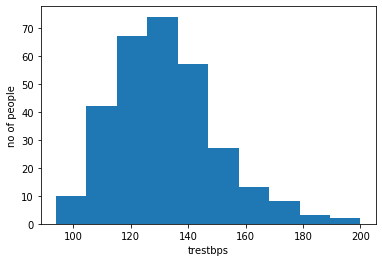

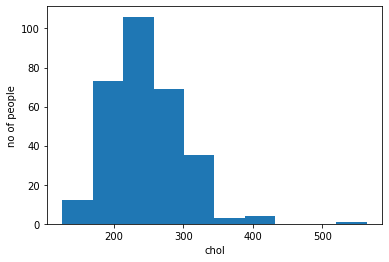

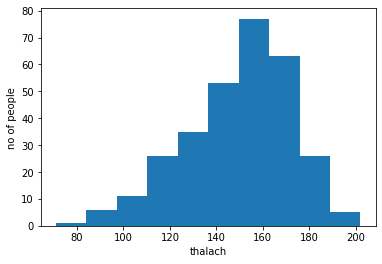

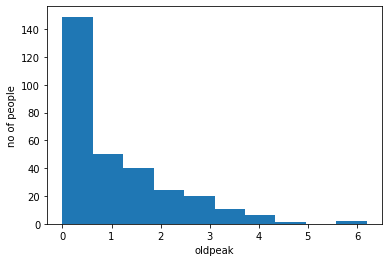

In [70]:
for i in data[numerical_data].columns:
    plt.hist(data[numerical_data][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('no of people')
    plt.show()

Text(0.5, 0, 'oldpeak')

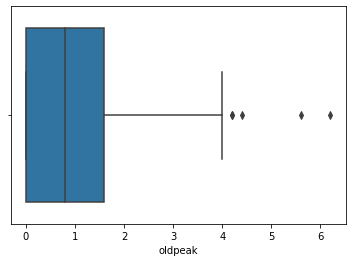

In [62]:
#oldpeak outliers
sns.boxplot(x=data['oldpeak'])
plt.xlabel('oldpeak')

Text(0.5, 0, 'cholesterol')

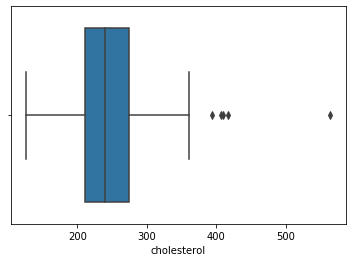

In [66]:
#cholesterol outliers
sns.boxplot(x=data['chol'])
plt.xlabel('cholesterol')

Text(0.5, 0, 'thalach')

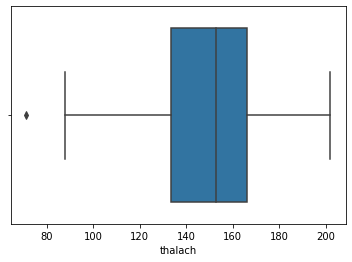

In [71]:
#trestbps outlier visualized
sns.boxplot(x=data['thalach'])
plt.xlabel('thalach')

Text(0.5, 0, 'trestbps')

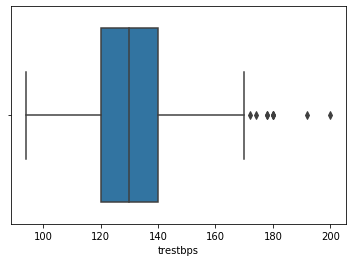

In [72]:
#trestbps outlier visualized
sns.boxplot(x=data['trestbps'])
plt.xlabel('trestbps')

In [36]:
#checking distribution of target variable
data['target'].value_counts()
#note: 1 indicates heart disease and vice versa

1    165
0    138
Name: target, dtype: int64

In [48]:
#fitting models to dataset
x = data.drop(columns='target', axis=1)
y = data['target']

In [49]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [50]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [52]:
print(x.shape, x_train.shape, x_test.shape)

(303, 13) (212, 13) (91, 13)


In [53]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1_fit = model1.fit(x_train, y_train)
model1_pred = model1_fit.predict(x_test)

In [54]:
#find accuracy of model on test data - KNeighbors
accuracy_score1 = accuracy_score(y_test, model1_pred)
accuracy_score1

0.6373626373626373

In [55]:
model2 = LogisticRegression()
model2_fit = model2.fit(x_train, y_train)
model2_pred = model2_fit.predict(x_test)

In [56]:
#find accuracy of model on test data - Logistic Regression
accuracy_score2 = accuracy_score(y_test, model2_pred)
accuracy_score2

0.7472527472527473

In [57]:
model3 = RandomForestClassifier() #most accurate out of the three
model3_fit = model3.fit(x_train, y_train)
model3_pred = model3_fit.predict(x_test)

In [47]:
#find accuracy of model on test data - Random Forest (seems to get all corre)
accuracy_score3 = accuracy_score(y_test, model3_pred)
accuracy_score3

0.8021978021978022